In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df= pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
final_sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

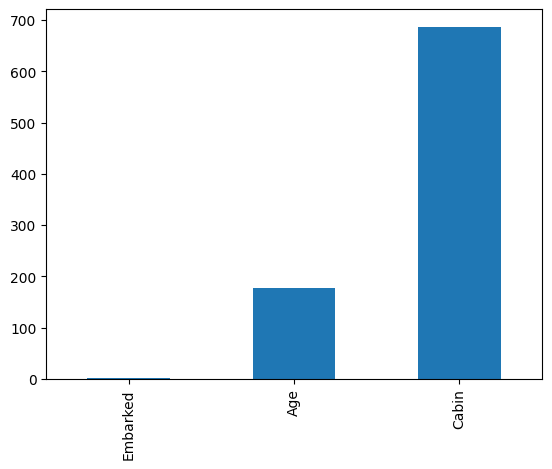

In [7]:
missing = df.isna().sum()
missing = missing[missing >0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


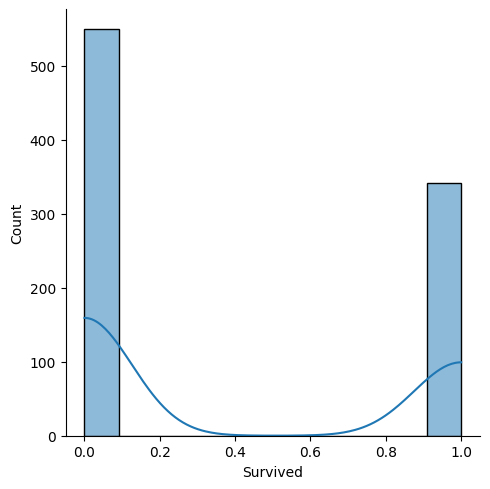

In [9]:
sns.displot(df['Survived'], kde=True)


In [10]:
numeric_features = df.select_dtypes(include=np.number)
numeric_features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
catagorial_features = df.select_dtypes(exclude=np.number)
catagorial_features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [12]:
correlation = numeric_features.corr()
print(correlation['Survived'].sort_values(ascending=False), '\n')

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64 



<Axes: >

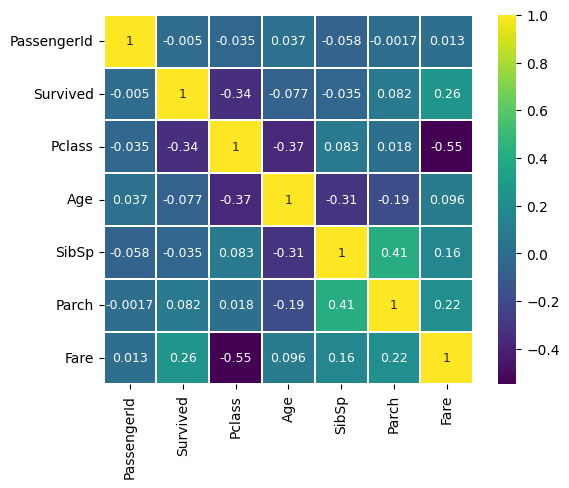

In [13]:
sns.heatmap(correlation, square=True, cmap='viridis', annot=True, annot_kws={'size':9}, linecolor='white', linewidths=0.01)

<Axes: xlabel='Survived', ylabel='Fare'>

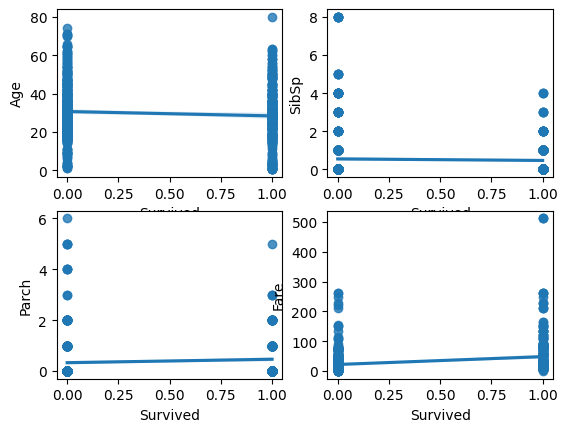

In [14]:
f, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
sns.regplot(data=df, x='Survived', y='Age', scatter=True, fit_reg=True, ax=ax1)
sns.regplot(data=df, x='Survived', y='SibSp', scatter=True, fit_reg=True, ax=ax2)
sns.regplot(data=df, x='Survived', y='Parch', scatter=True, fit_reg=True, ax=ax3)
sns.regplot(data=df, x='Survived', y='Fare', scatter=True, fit_reg=True, ax=ax4)

<Axes: >

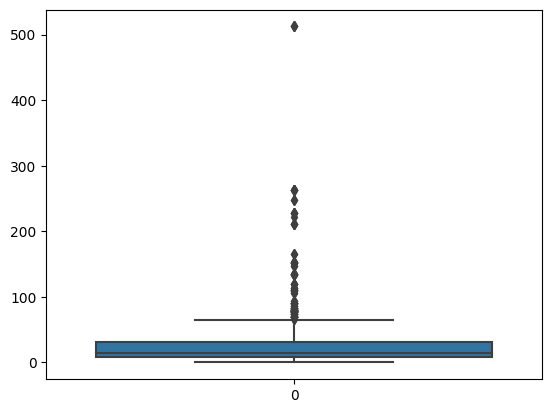

In [15]:
sns.boxplot(df['Fare'])

In [16]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
def remove_outliers(df, columns):
    for col in columns:
        first_quartile = df[col].quantile(.25)
        third_quartile = df[col].quantile(.75)
        IQR = third_quartile - first_quartile
        new_boundary = third_quartile + 3 * IQR
        df.drop(df[df[col] > new_boundary].index, axis=0, inplace=True)
    return df

In [18]:
remove_outliers(df, ['Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

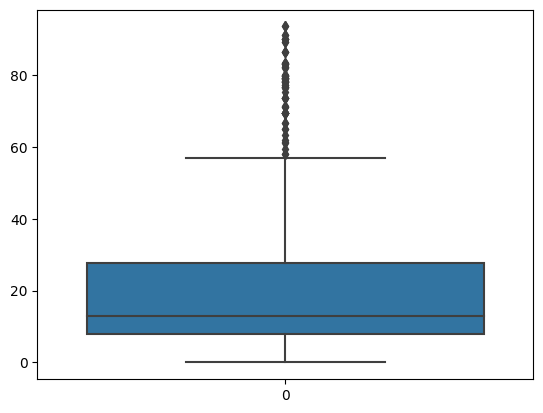

In [19]:
sns.boxplot(df['Fare'])

<Axes: ylabel='Age'>

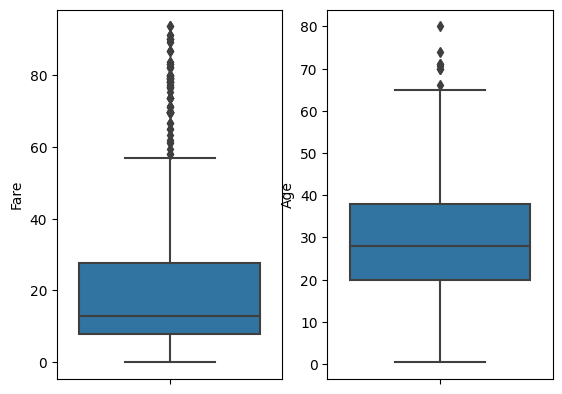

In [20]:
f, ((ax1,ax2)) = plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, y='Fare', ax=ax1)
sns.boxplot(data=df, y='Age', ax=ax2)

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [22]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          677
Embarked         2
dtype: int64

In [23]:

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])


In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          677
Embarked         0
dtype: int64

In [25]:
numeric_features = df.select_dtypes(include=np.number)

In [26]:
catagorial_features.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [27]:
drop_col = ['Name','Ticket', 'Cabin','PassengerId']

In [28]:
df.drop(drop_col, axis=1, inplace=True)


In [29]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [30]:
sex_mapping= {'male':0, 'female':1}
df['Sex']=df['Sex'].map(sex_mapping)

In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Embarked', ylabel='Count'>

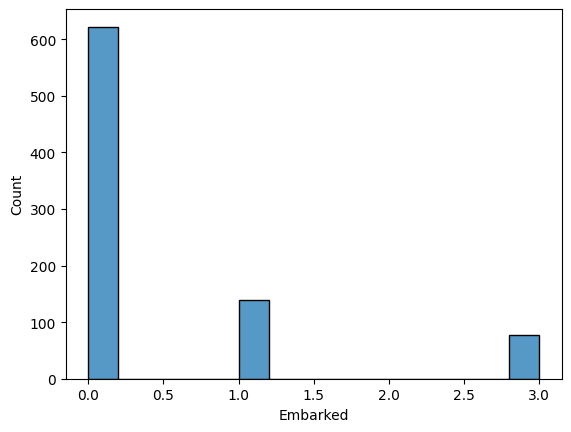

In [56]:
sns.histplot(df['Embarked'])

In [33]:
embarked_mapping = {'S':0, 'C':1, 'Q':3}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [35]:
df['Fare']= df['Fare'].round(2)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.25,0
1,1,1,1,38.0,1,0,71.28,1
2,1,3,1,26.0,0,0,7.92,0
3,1,1,1,35.0,1,0,53.10,0
4,0,3,0,35.0,0,0,8.05,0


In [37]:
final_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [38]:
X = df[final_features]

In [39]:
y = df['Survived']

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    838 non-null    int64  
 1   Sex       838 non-null    int64  
 2   Age       838 non-null    float64
 3   SibSp     838 non-null    int64  
 4   Parch     838 non-null    int64  
 5   Fare      838 non-null    float64
 6   Embarked  838 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 84.7 KB


In [41]:
test_PassengerId = test_data['PassengerId']

In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
test_data = test_data[final_features]

In [44]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())


In [45]:
sex_mapping= {'male':0, 'female':1}
test_data['Sex']=test_data['Sex'].map(sex_mapping)

In [46]:
embarked_mapping = {'S':0, 'C':1, 'Q':3}
test_data['Embarked'] =test_data['Embarked'].map(embarked_mapping)

In [47]:
test_data['Fare']= test_data['Fare'].fillna(test_data['Fare'].mean())

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [50]:
rf = AdaBoostClassifier()
rf.fit(X, y)
predict = rf.predict(test_data)

In [51]:
final_sub = final_sub.drop('Survived', axis=1)
final_sub['Survived'] = predict


In [52]:
final_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
